In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from datetime import datetime
from math import cos, asin, sqrt, pi, acos, sin
import json


In [2]:
# sns.set(style="ticks")
sns.set_style("darkgrid")

In [3]:
dt_train = pd.read_csv('split/train.csv')
dt_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967
...,...,...,...,...,...,...,...,...,...,...
999995,id2875371,2,2016-03-25 15:48:58,1,-73.959106,40.771770,-73.953995,40.786312,N,254
999996,id1038420,2,2016-05-04 19:36:44,1,-73.970978,40.764015,-73.956230,40.777851,N,434
999997,id3238884,2,2016-05-19 08:50:41,2,-73.982178,40.771240,-73.970749,40.758968,N,1306
999998,id3652642,2,2016-04-04 14:37:59,6,-73.982513,40.765533,-74.005974,40.711842,N,2317


In [6]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [7]:
dt_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,9.548850e+02
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,3.882070e+03
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,3.970000e+02
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,6.620000e+02
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,1.074000e+03
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,2.227612e+06


In [8]:
dt_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

###  Structucting 

    - let's first get some insights from the datetime. we can extract:
        - hour 
        - day 
        - week
        - month
        - year

In [9]:

dt_train['pickup_datetime'] = pd.to_datetime(dt_train['pickup_datetime'])
dt_train['hour'] = dt_train['pickup_datetime'].dt.hour
dt_train['year'] = dt_train['pickup_datetime'].dt.year
dt_train['day_name'] = dt_train['pickup_datetime'].dt.day_name().str.slice(stop=3)
dt_train['week'] = dt_train['pickup_datetime'].dt.isocalendar().week
dt_train['month'] = dt_train['pickup_datetime'].dt.month
dt_train['month_txt'] = dt_train['pickup_datetime'].dt.month_name().str.slice(stop=3)

In [10]:
dt_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,day_name,week,month,month_txt
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,7,2016,Wed,23,6,Jun
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,12,2016,Sun,13,4,Apr
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,2,2016,Sun,22,6,Jun
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,17,2016,Thu,18,5,May
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,17,2016,Thu,19,5,May


    - let's get some insight about the time represinting the data


### Year

In [11]:
dt_train['year'].unique(), dt_train['month'].unique()

(array([2016]), array([6, 4, 5, 3, 2, 1]))

### Month_txt

<Axes: xlabel='month_txt', ylabel='Count'>

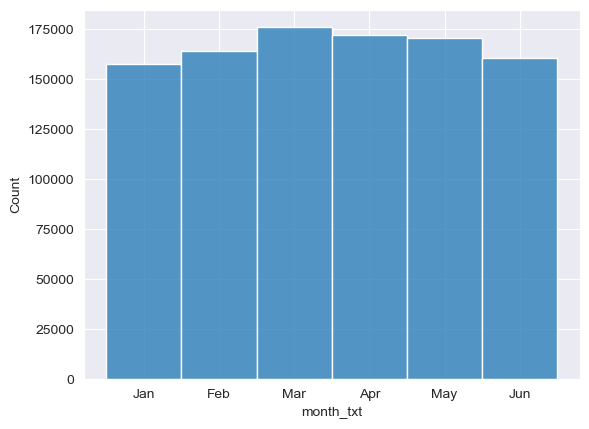

In [12]:
dt_train['month_txt'] = pd.Categorical(dt_train['month_txt'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
sns.histplot(data=dt_train, x="month_txt", discrete=True)

### day_name

###  
    - Does day affects the trip duration? 

In [13]:
dt_train['day_name'].unique()

array(['Wed', 'Sun', 'Thu', 'Fri', 'Tue', 'Mon', 'Sat'], dtype=object)

<Axes: xlabel='day_name', ylabel='Count'>

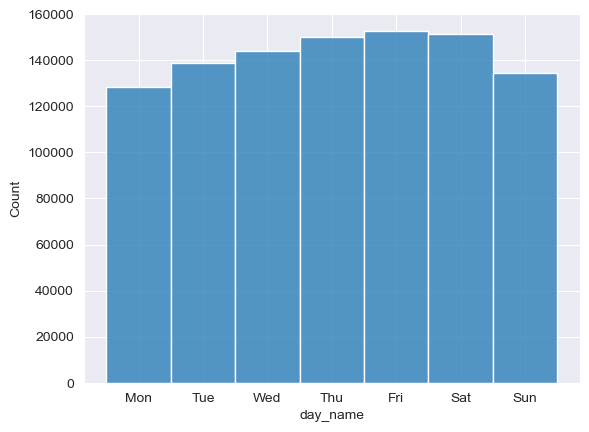

In [14]:
dt_train['day_name'] = pd.Categorical(dt_train['day_name'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
sns.histplot(data=dt_train, x="day_name")

<Axes: xlabel='day_name', ylabel='id'>

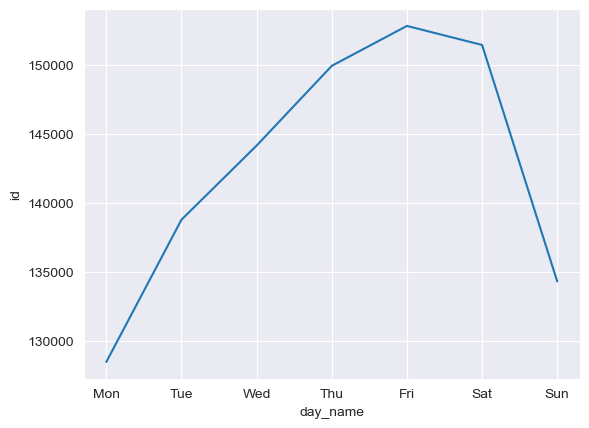

In [15]:
count_trips_day = dt_train.groupby(["day_name"]).count()['id'].reset_index().sort_values(by='id')
sns.lineplot(data=count_trips_day, x='day_name', y='id')


    - From the above, Friday and saturday has the higher number of trips. This is may be due to Friday is the last day of work and saturday is weekend.

In [16]:
day_hour_count = dt_train.groupby(["day_name", "hour"]).count().reset_index()[['day_name', 'hour', 'id']]

In [17]:
day_hour_count

,day_name,hour,id
0,Mon,0,2889
1,Mon,1,1786
2,Mon,2,1146
3,Mon,3,838
4,Mon,4,898
...,...,...,...
163,Sun,19,6823
164,Sun,20,6285
165,Sun,21,5951
166,Sun,22,5403


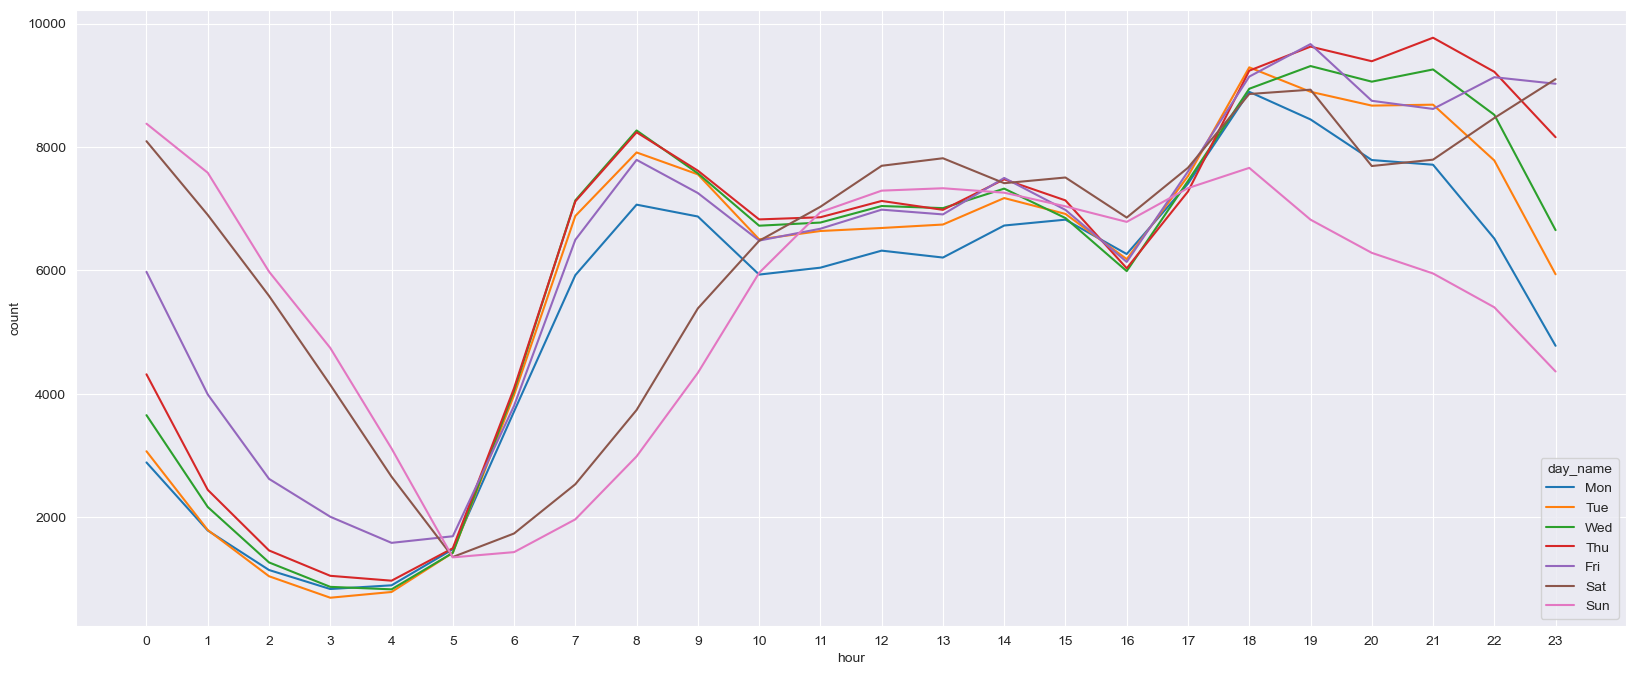

In [18]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
ax.set_xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.ylabel('count')
sns.lineplot(data=day_hour_count, x='hour', y='id', hue='day_name')
plt.show()

    - if we focus on number of trips on weekend we  will notice that early hours from 5 to 10 has a 
    small number of trips because no work. also they have the high number of trips on 12 am
    - but for other days vice versa.

### let's investigate the rush hours at work days

In [19]:
day_hour_trip = dt_train.groupby(['hour', 'day_name'])[['trip_duration']].mean().reset_index()


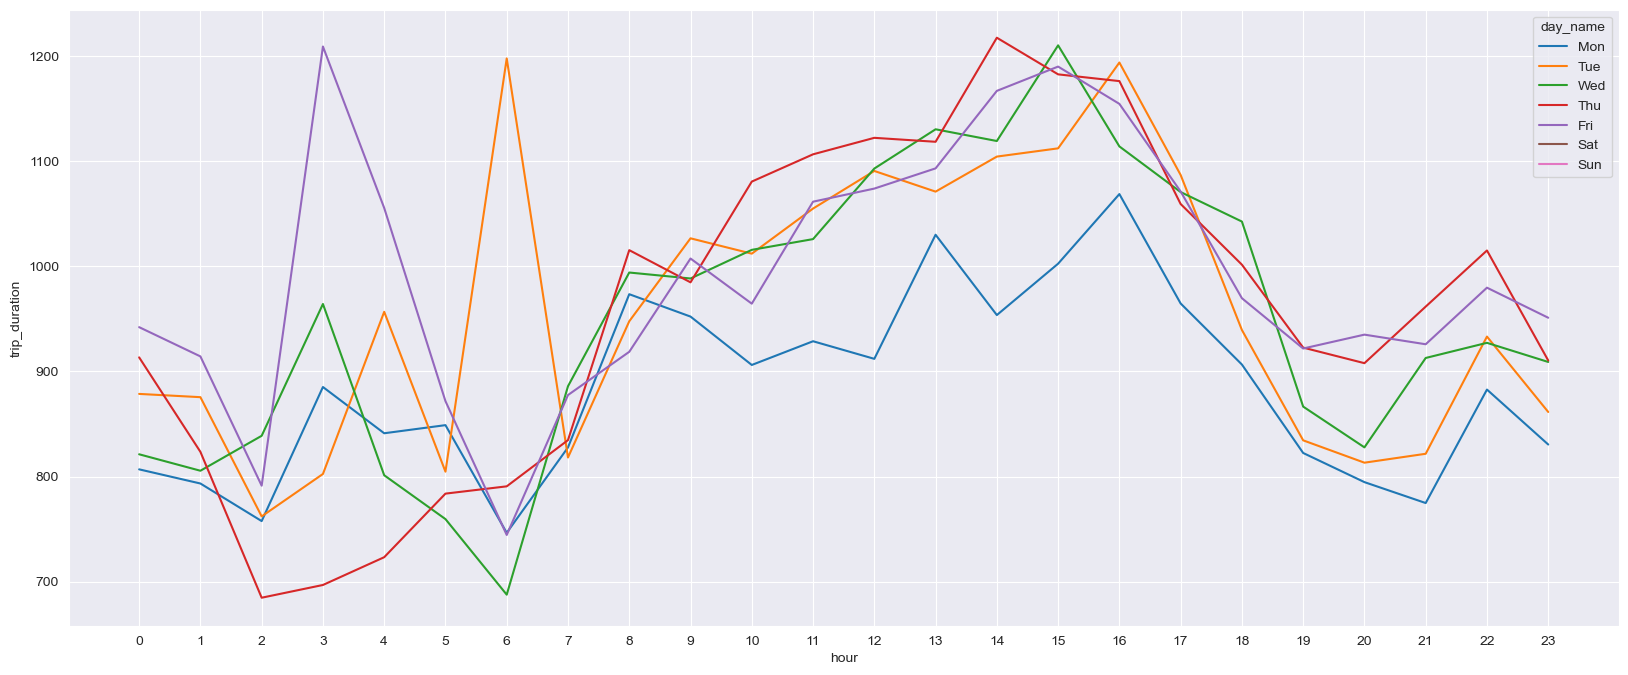

In [20]:
work_day_hour_trip = day_hour_trip.loc[day_hour_trip['day_name'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])]
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
ax.set_xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.ylabel('trip_duration')
sns.lineplot(data=work_day_hour_trip, x='hour', y='trip_duration', hue='day_name')
plt.show()

     - Trips take more time at Rush hours form 12 pm to 17 pm.

### let's investigate the rush hours at workend

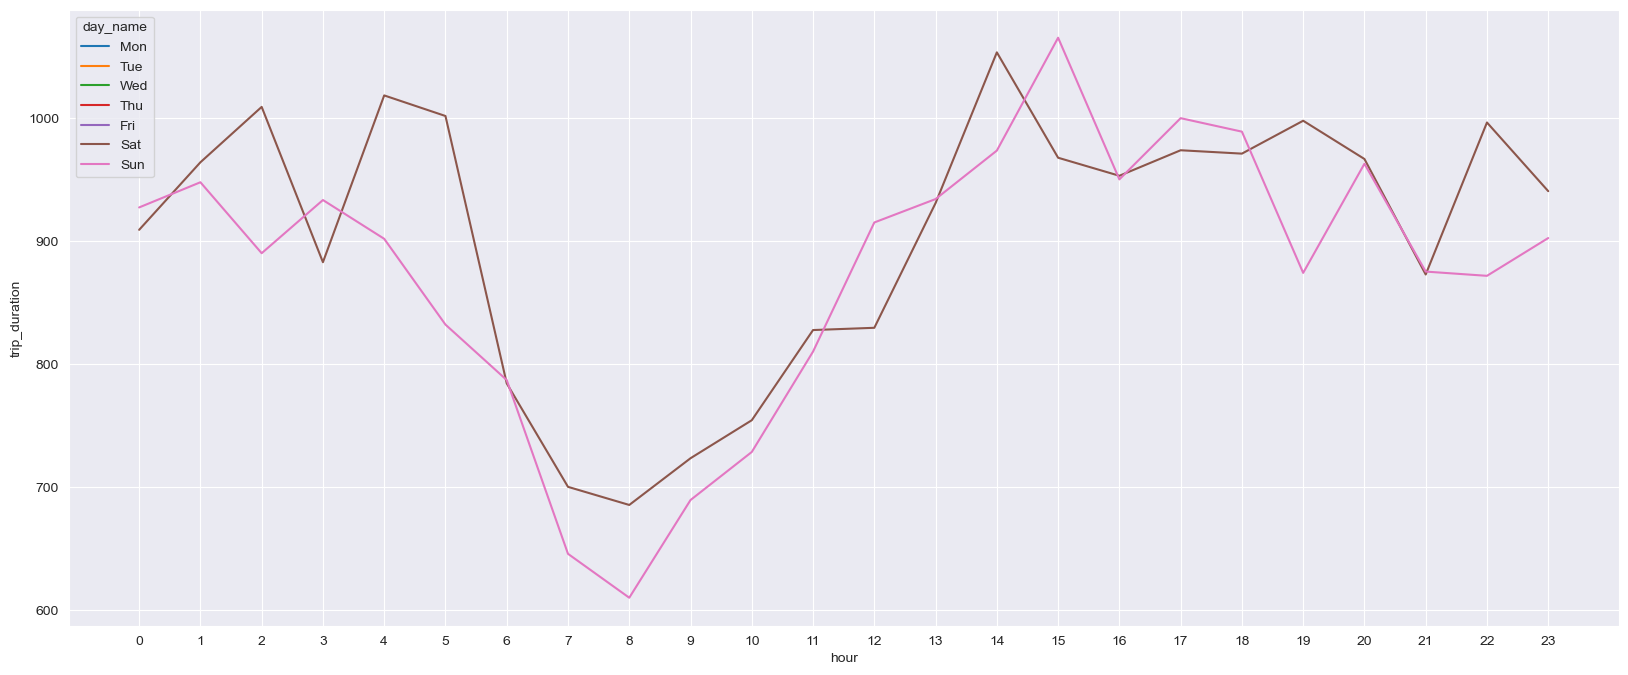

In [21]:
weekend_day_hour_trip = day_hour_trip.loc[day_hour_trip['day_name'].isin(['Sat', 'Sun'])]
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
ax.set_xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.ylabel('trip_duration')
sns.lineplot(data=weekend_day_hour_trip, x='hour', y='trip_duration', hue='day_name')
plt.show()

    - At weekend days, from 6am. to 10am. the trip duration takes less time because no need to go out 
      and also the number of trip is few. and we can notice that trip from 0am. to 3am. take more time 
      may people tend to go out in this time at weekend.

    - from these graphs we can consider that 
        - hour is a good feature 
        - if day is weekend or workday also a good feature 

In [22]:
dt_train['is_workday'] = dt_train['day_name'].apply(lambda x: 0 if x == ('Sat' or 'Sun') else 1) 

### passengers


    - Does the number of passengers affects the trip duration?

In [23]:
passenger_count_trip_duration = dt_train.groupby(["passenger_count"])[['trip_duration']].mean().reset_index().sort_values(by=['trip_duration'], ascending=False)
passenger_count_trip_duration

,passenger_count,trip_duration
5,5,1072.365526
6,6,1071.311894
4,4,1053.786055
3,3,1030.274651
2,2,996.547652
1,1,925.023671
0,0,184.789474
7,7,20.000000


    - mean trip duration for 7 passengers is very weird they are very far from other values.
    - Also, ZERO passeneger can't be comsider a taxi trip !!

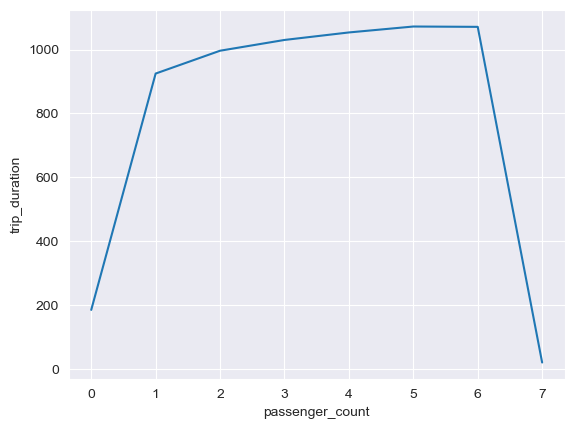

In [24]:
plt.grid(True)
plt.ylabel('trip_duration')
sns.lineplot(data=passenger_count_trip_duration, x='passenger_count', y='trip_duration')
plt.show()

    - let's draw the Curve again without ZERO and SEVEN 

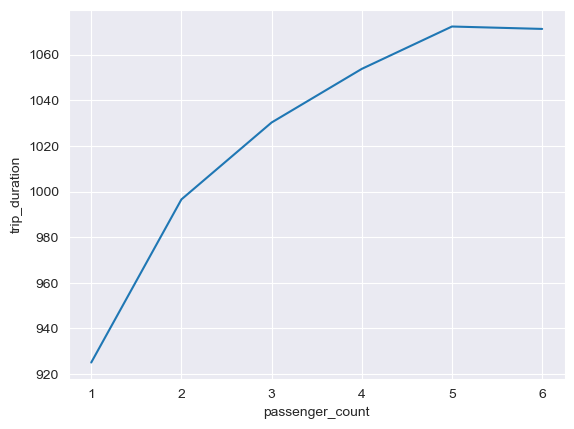

In [25]:

passenger_count_trip_duration_not_0_7 = passenger_count_trip_duration.loc[passenger_count_trip_duration['passenger_count'].isin([1, 2, 3,4,5,6])]
plt.grid(True)
sns.lineplot(data=passenger_count_trip_duration_not_0_7, x='passenger_count', y='trip_duration')
plt.show()

    - Although the difference between 925 lowest valuse and 1072 highest value is not far away. but it make sense.
    if the number of passenger increses the trip duration may be slightly increase.

<Axes: xlabel='passenger_count', ylabel='count'>

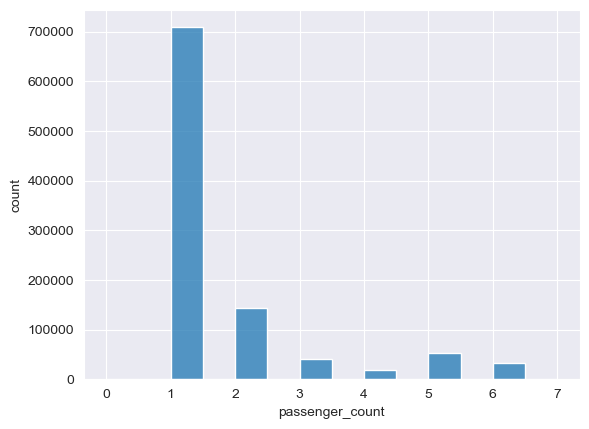

In [26]:
plt.grid(True)
plt.ylabel('count')
sns.histplot(data=dt_train, x="passenger_count", binwidth=.5)

    - Almost all the trips has only one passenger. the model will learn more about only one passsengr.

## Investigating 

    ##############################################################################
    ### we will need to investigate passenger count == 0 and also passenger count for 7.
    ##############################################################################

In [27]:
dt_train[dt_train['passenger_count'] == 7]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,day_name,week,month,month_txt,is_workday
237191,id0506488,2,2016-05-08 22:39:08,7,-74.039482,40.715031,-74.039482,40.715019,N,15,22,2016,Sun,18,5,May,1
662141,id0988237,2,2016-04-23 19:46:08,7,-73.631149,40.768551,-73.631149,40.768551,N,25,19,2016,Sat,16,4,Apr,0


### 
    - The Two trip durations are just 1.5 meters and takes only 15, 25 sec
    - So counting this a trip is misleading. let' drop it.

In [28]:
dt_train[dt_train['passenger_count'] == 0]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,day_name,week,month,month_txt,is_workday
1294,id1038365,1,2016-04-02 22:03:27,0,-73.954437,40.765739,-73.954445,40.765759,N,9,22,2016,Sat,13,4,Apr,0
13400,id2535067,1,2016-06-13 05:59:07,0,-73.947174,40.826153,-73.947220,40.826084,Y,9,5,2016,Mon,24,6,Jun,1
45328,id0414625,2,2016-01-05 18:52:20,0,-73.985291,40.738335,-73.985352,40.738361,N,15,18,2016,Tue,1,1,Jan,1
64394,id3364866,1,2016-02-13 14:04:20,0,-73.990479,40.742004,-73.989243,40.763680,N,1029,14,2016,Sat,6,2,Feb,0
120540,id3347660,2,2016-05-29 01:26:30,0,-73.932732,40.856438,-73.932762,40.856438,N,19,1,2016,Sun,21,5,May,1
126060,id1325601,2,2016-05-05 02:00:31,0,-73.995796,40.720516,-73.995667,40.720551,N,14,2,2016,Thu,18,5,May,1
158162,id0662963,2,2016-02-13 04:41:13,0,-73.945633,40.803673,-73.945625,40.803661,N,9,4,2016,Sat,6,2,Feb,0
160869,id2684721,2,2016-04-01 14:42:10,0,-73.981316,40.746635,-73.981651,40.746811,N,48,14,2016,Fri,13,4,Apr,1
216942,id1794493,2,2016-03-20 01:25:42,0,-73.995094,40.760296,-73.995064,40.760284,N,22,1,2016,Sun,11,3,Mar,1
221380,id3378693,1,2016-05-15 15:31:07,0,-73.783173,40.643848,-73.783173,40.643848,N,6,15,2016,Sun,19,5,May,1


    - most of trip duration is less than 1 min. so, trip with no passenger and less 1 min can't be ea trip

## Deleting 

    ##############################################################################
    ### we will need to delete passenger count == 0 and also passenger count for 7.
    ##############################################################################

In [29]:
dt_train.drop(dt_train.loc[(dt_train['passenger_count'] == 0)
                       | (dt_train['passenger_count'] == 7)].index, inplace=True)

In [30]:
dt_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'hour',
       'year', 'day_name', 'week', 'month', 'month_txt', 'is_workday'],
      dtype='object')

### Till now     
    
    - we investigate ['hour', 'year', 'day_name', 'week', 'month', 'month_txt', 
    'is_workday'] all these features extracted from pickup_datetime and passenger_count .

### Investigating
    let's first ask some questions
    - Trips with time less than 1 minute, should we consider it as a trip ?  
    - The distance less than 100m should we consider it a trip?.
    - If a trip has no passenger so, why we call it a trip !!?
    - Trips with same pickup and drop off long/lat should we call it a trip ?
    

    - let's investigate more a bout distance 
        using these features 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'.
        we can caculate approximated distance for the trip.

### Distance
ref: https://www.movable-type.co.uk/scripts/latlong.html 

In [31]:
def distCosine(row):
    """
    This function compute the distance between two points using latitude and longitude.
    returns:
        distance in kilometer

    """
    
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']
    
    r = 6371
    p = pi/180

    out = acos(round(sin(pickup_lat * p) * sin(dropoff_lat * p) +\
               cos(pickup_lat * p) * cos(dropoff_lat * p) *\
               cos((dropoff_lon - pickup_lon) * p), 12)) * r

    return round(out, 3)

In [32]:
dt_train['distance'] = dt_train.apply(lambda x: distCosine(x), axis=1)

In [33]:
dt_train.describe()[['trip_duration', 'distance']]

,trip_duration,distance
count,9.999600e+05,999960.000000
mean,9.549161e+02,3.439194
std,3.882144e+03,4.424267
min,1.000000e+00,0.000000
25%,3.970000e+02,1.232000
50%,6.620000e+02,2.091000
75%,1.074000e+03,3.871000
max,2.227612e+06,1240.909000


### distance
    mean distance is 3.43 km and around 75% of the data is less than 3.8 km. So, max distancee is very very far.

### trip_duration
    mean trip is 954 s and around 75% of. the data is less than 1000 s. so, max trip duration is very far.


### let's define steps  
    1 - Apply plot drawing 
    2 - apply outliers mechanism 
    3 - apply plot agin. describe . 
    4 - save the data. 
    5 - apply feature engineering. 

<Axes: xlabel='distance', ylabel='trip_duration'>

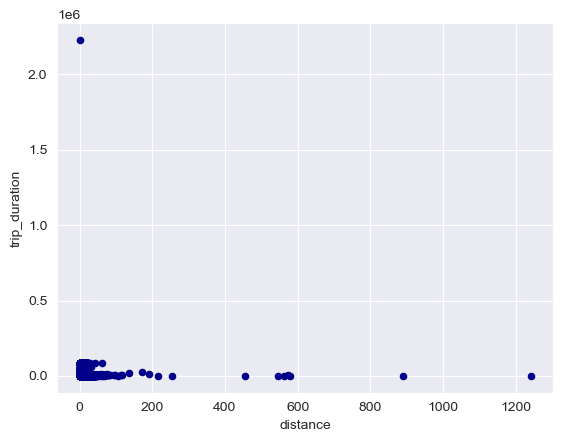

In [34]:
dt_train.plot.scatter(x='distance', y='trip_duration', c='DarkBlue')

### 
    - From this plot we can notice outliers far away from the distribution. 
   

### let's get outlier index and remove  them.

In [35]:
def get_outliers(df, column_name):
    
    Q1 = df[column_name].describe().loc[['25%']].item()
    Q3 = df[column_name].describe().loc[['75%']].item()

    IQR = Q3 - Q1
    lower = Q1 - 3*IQR
    upper = Q3 + 3*IQR
    
    print(f'For {column_name}: the lower value is {lower} and the upper value is {upper}.')
    # Create arrays of Boolean values indicating the outlier rows
    upper_array = df.loc[df[column_name] < lower].index
    lower_array = df.loc[df[column_name] > upper].index
    all_index = upper_array.append(lower_array)
    print(f'For {column_name}: The number of removed data is {len(all_index)}.')
    return all_index


In [36]:
column_name = 'distance'
outlier_distance = get_outliers(dt_train, column_name)

column_name = 'trip_duration'
outlier_duration = get_outliers(dt_train, column_name)

union_outliers = np.union1d(outlier_distance, outlier_duration)

For distance: the lower value is -6.6850000000000005 and the upper value is 11.788.
For distance: The number of removed data is 44914.
For trip_duration: the lower value is -1634.0 and the upper value is 3105.0.
For trip_duration: The number of removed data is 14420.


<Axes: xlabel='distance', ylabel='trip_duration'>

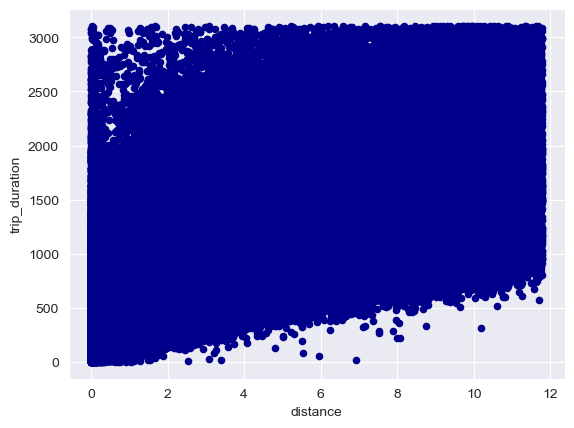

In [37]:

dt_train.drop(index=union_outliers, inplace=True)

dt_train.plot.scatter(x='distance', y='trip_duration', c='DarkBlue')

### 
    - Any trip with distance = 0 or same long/lat for pickup and dropoff will be deleted.

In [38]:
dt_train.loc[dt_train['distance'] <= 0]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,day_name,week,month,month_txt,is_workday,distance
67,id2394980,2,2016-06-07 19:21:39,1,-73.954140,40.741566,-73.954140,40.741566,N,1212,19,2016,Tue,23,6,Jun,1,0.0
282,id2515232,1,2016-02-20 09:13:56,1,-73.990768,40.766518,-73.990768,40.766518,N,973,9,2016,Sat,7,2,Feb,0,0.0
337,id1954034,1,2016-03-10 04:08:10,1,-73.954857,40.688107,-73.954865,40.688107,N,16,4,2016,Thu,10,3,Mar,1,0.0
357,id3015440,1,2016-04-23 19:31:22,1,-73.993027,40.723320,-73.993027,40.723316,N,11,19,2016,Sat,16,4,Apr,0,0.0
543,id2495915,1,2016-05-01 09:52:23,2,-73.799416,40.838963,-73.799416,40.838963,N,430,9,2016,Sun,17,5,May,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999491,id1190436,1,2016-06-19 05:45:08,1,-73.995674,40.762012,-73.995674,40.762012,N,5,5,2016,Sun,24,6,Jun,1,0.0
999546,id2362672,2,2016-06-22 08:49:43,6,-73.990662,40.756329,-73.990662,40.756329,N,472,8,2016,Wed,25,6,Jun,1,0.0
999600,id3345666,1,2016-02-20 03:49:05,1,-73.994713,40.770180,-73.994713,40.770180,N,973,3,2016,Sat,7,2,Feb,0,0.0
999898,id0433450,1,2016-04-06 17:50:25,1,-73.984375,40.679970,-73.984375,40.679970,N,26,17,2016,Wed,14,4,Apr,1,0.0


### 
    - From this data we can notice that the pickup off and drop off latitude the same.

In [39]:
dt_train[(dt_train['pickup_longitude'] == dt_train['dropoff_longitude']) & (dt_train['pickup_latitude'] == dt_train['dropoff_latitude'])]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,day_name,week,month,month_txt,is_workday,distance
67,id2394980,2,2016-06-07 19:21:39,1,-73.954140,40.741566,-73.954140,40.741566,N,1212,19,2016,Tue,23,6,Jun,1,0.0
282,id2515232,1,2016-02-20 09:13:56,1,-73.990768,40.766518,-73.990768,40.766518,N,973,9,2016,Sat,7,2,Feb,0,0.0
543,id2495915,1,2016-05-01 09:52:23,2,-73.799416,40.838963,-73.799416,40.838963,N,430,9,2016,Sun,17,5,May,1,0.0
703,id0299071,2,2016-05-21 01:50:55,2,-73.973633,40.787182,-73.973633,40.787182,N,14,1,2016,Sat,20,5,May,0,0.0
890,id1997932,2,2016-05-26 19:31:09,6,-73.819061,40.685547,-73.819061,40.685547,N,435,19,2016,Thu,21,5,May,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999491,id1190436,1,2016-06-19 05:45:08,1,-73.995674,40.762012,-73.995674,40.762012,N,5,5,2016,Sun,24,6,Jun,1,0.0
999546,id2362672,2,2016-06-22 08:49:43,6,-73.990662,40.756329,-73.990662,40.756329,N,472,8,2016,Wed,25,6,Jun,1,0.0
999600,id3345666,1,2016-02-20 03:49:05,1,-73.994713,40.770180,-73.994713,40.770180,N,973,3,2016,Sat,7,2,Feb,0,0.0
999898,id0433450,1,2016-04-06 17:50:25,1,-73.984375,40.679970,-73.984375,40.679970,N,26,17,2016,Wed,14,4,Apr,1,0.0


### Deleteing 
    - The data with same long/lat can't be a trip so, let's delete it.

In [40]:
dt_train.drop(dt_train[(dt_train['pickup_longitude'] == dt_train['dropoff_longitude']) & (dt_train['pickup_latitude'] == dt_train['dropoff_latitude'])].index, inplace=True)

<Axes: xlabel='distance', ylabel='trip_duration'>

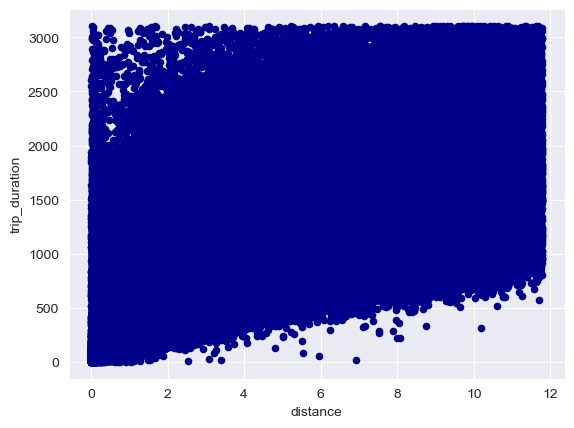

In [41]:
dt_train.plot.scatter(x='distance', y='trip_duration', c='DarkBlue')

### 
    - After cleaning some data let's investigate trip duration and distance.

In [42]:
dt_train.describe()[['trip_duration', 'distance']]

,trip_duration,distance
count,946482.000000,946482.000000
mean,750.628956,2.748623
std,494.329214,2.252896
min,1.000000,0.000000
25%,386.000000,1.207000
50%,633.000000,1.999000
75%,994.000000,3.482000
max,3105.000000,11.788000


### 
    - The distance less than 100m should we consider it a trip?

<Axes: xlabel='distance', ylabel='trip_duration'>

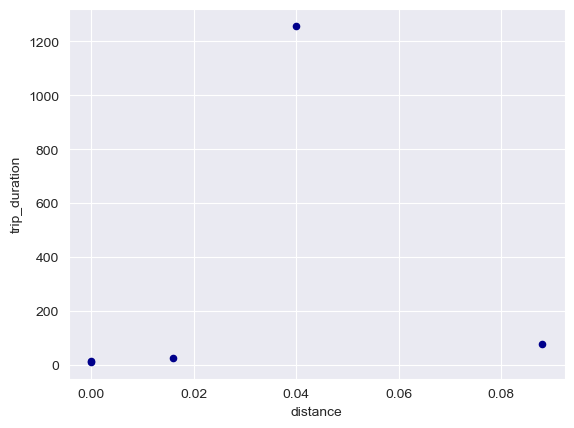

In [43]:
dt_train[dt_train['distance'] <= .100].head().plot.scatter(x='distance', y='trip_duration', c='DarkBlue')

In [44]:
dt_train.drop(dt_train[dt_train['distance'] <= .100].index, inplace=True)

In [45]:
dt_train.describe()[['trip_duration', 'distance']]

,trip_duration,distance
count,941458.000000,941458.000000
mean,753.103920,2.763131
std,493.008101,2.250104
min,1.000000,0.101000
25%,388.000000,1.218000
50%,635.000000,2.009000
75%,996.000000,3.495000
max,3105.000000,11.788000


    - Trip duration less than 1 min. should we consider it a trip?

<Axes: xlabel='distance', ylabel='trip_duration'>

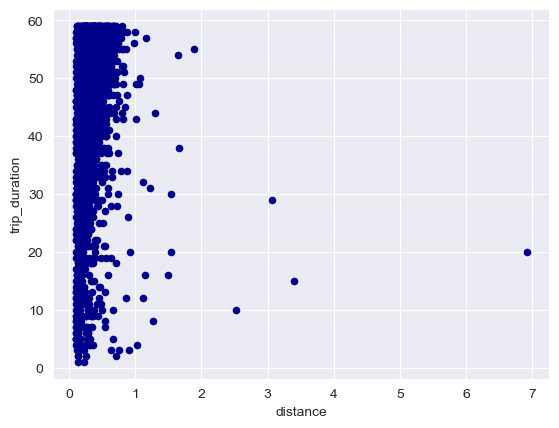

In [46]:
dt_train[dt_train['trip_duration'] <= 59].plot.scatter(x='distance', y='trip_duration', c='DarkBlue')

In [47]:

dt_train.drop(dt_train[dt_train['trip_duration'] <= 59].index, inplace=True)

<Axes: xlabel='distance', ylabel='trip_duration'>

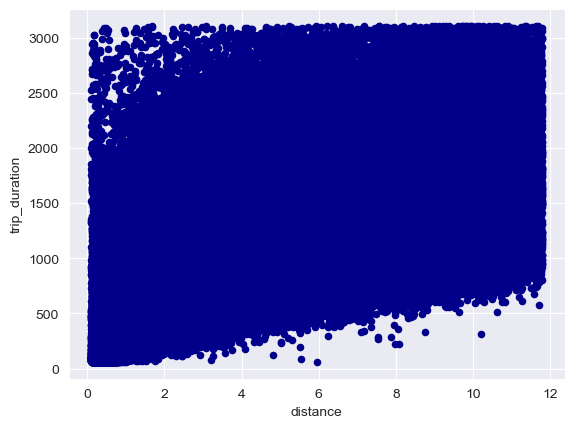

In [48]:
dt_train.plot.scatter(x='distance', y='trip_duration', c='DarkBlue')

### store_and_fwd_flag

In [49]:
dt_train['store_and_fwd_flag'].value_counts()

N    934767
Y      4784
Name: store_and_fwd_flag, dtype: int64

<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

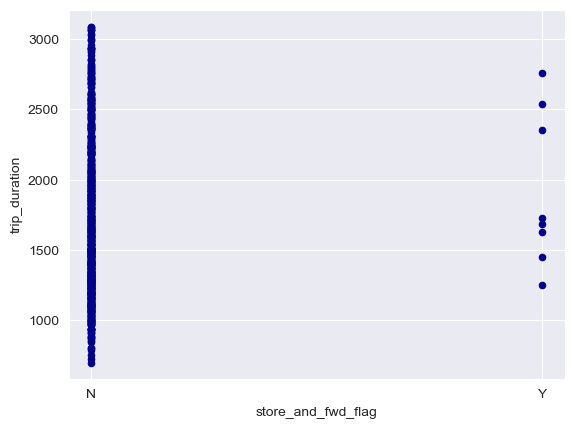

In [50]:
dt_train.loc[(dt_train['distance'] < 11) & (dt_train['distance'] > 10.9)].plot.scatter(x='store_and_fwd_flag', y='trip_duration', c='DarkBlue')

<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

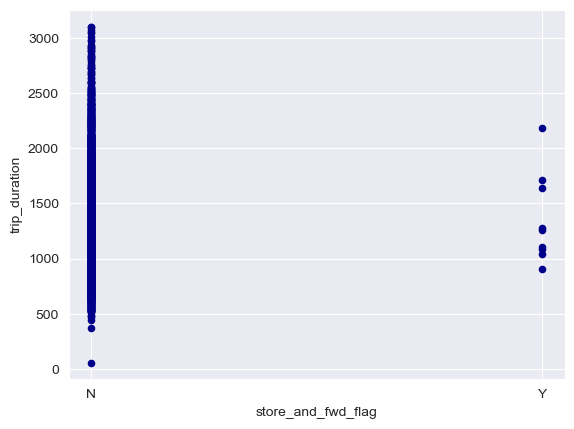

In [51]:
dt_train.loc[(dt_train['distance'] < 6) & (dt_train['distance'] > 5.9)].plot.scatter(x='store_and_fwd_flag', y='trip_duration', c='DarkBlue')

### 
    - From this charts store_and_fwd_flag doesn't really affect the trip duration.

### Vendor id

In [52]:
dt_train['vendor_id'].value_counts()

2    501038
1    438513
Name: vendor_id, dtype: int64

<Axes: xlabel='distance', ylabel='count'>

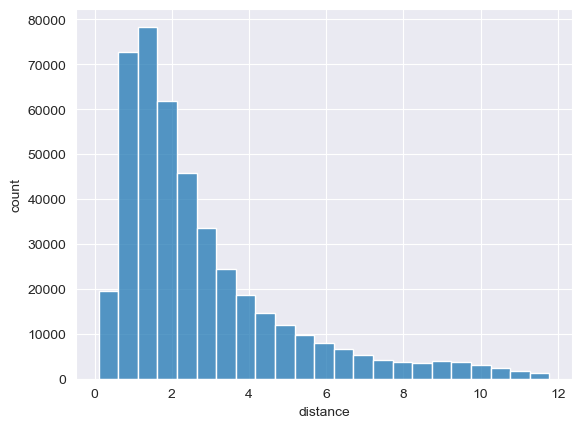

In [53]:
dt_train_vendor_1 = dt_train[dt_train['vendor_id']== 1]
plt.ylabel('count')
sns.histplot(data=dt_train_vendor_1, x="distance", binwidth=.5)

<Axes: xlabel='distance', ylabel='count'>

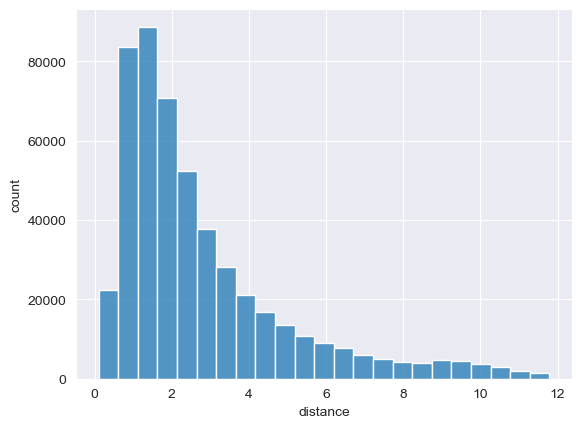

In [54]:
dt_train_vendor_2 = dt_train[dt_train['vendor_id']== 2]
plt.ylabel('count')
sns.histplot(data=dt_train_vendor_2, x="distance", binwidth=.5)

    - almost vendor_id 1,  2 has the same distribution according to distance.

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

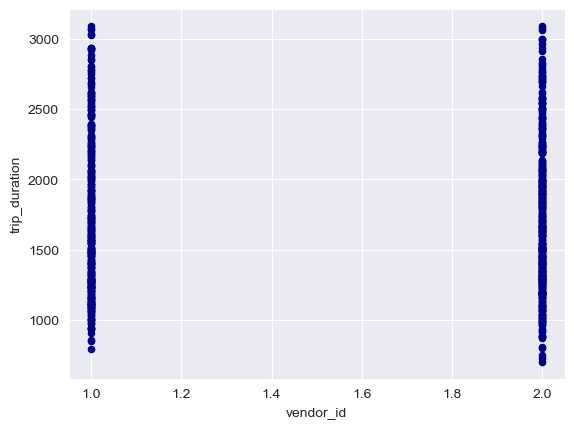

In [55]:
dt_train.loc[(dt_train['distance'] < 11) & (dt_train['distance'] > 10.9)].plot.scatter(x='vendor_id', y='trip_duration', c='DarkBlue')

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

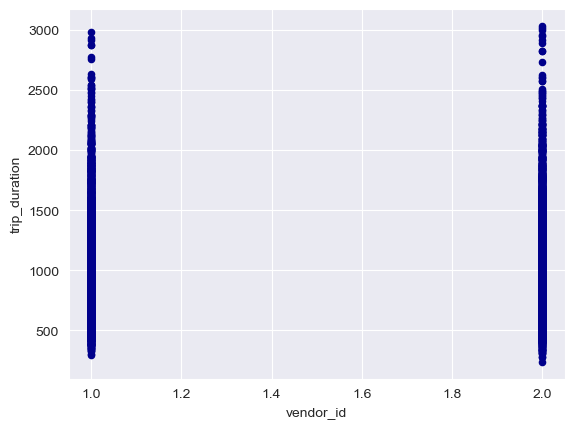

In [56]:
dt_train.loc[(dt_train['distance'] < 4) & (dt_train['distance'] > 3.9)].plot.scatter(x='vendor_id', y='trip_duration', c='DarkBlue')

### 
    - I think vendor id doesn't affect trip duration.

## Conclusion 

In [57]:
dt_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'hour',
       'year', 'day_name', 'week', 'month', 'month_txt', 'is_workday',
       'distance'],
      dtype='object')

    For modeling this data, we will use this features
        - passenger_count
        - hour
        - distance
        - is_workday
        - 'pickup_longitude', 'pickup_latitude'
        - 'dropoff_longitude', 'dropoff_latitude'
        - trip_duration [target]

    But multiple transformation needed to be done.
    passenger_counr: standraization 
    hour: categorized the day to 3 or 4 parts and then one hot encoding
    distance: can't be bound. so, log may be a good option.
    'pickup_longitude', 'pickup_latitude'
        - 'dropoff_longitude', 'dropoff_latitude': converted to angles
    Trip_duration: we can use log scale to lower down the values.
    
    
    
    
    

In [58]:
dt_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,day_name,week,month,month_txt,is_workday,distance
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,7,2016,Wed,23,6,Jun,1,2.763
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,12,2016,Sun,13,4,Apr,1,1.959
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,2,2016,Sun,22,6,Jun,1,1.405
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,17,2016,Thu,18,5,May,1,1.979
5,id2734699,2,2016-04-14 12:17:42,3,-73.969833,40.768570,-73.962646,40.767181,N,374,12,2016,Thu,15,4,Apr,1,0.625


In [59]:
file_name = 'new_train_1'
dt_train.to_csv(f'clean/{file_name}.csv', index=False)

### All feature engineering code

In [60]:
class FeatureExtracting(object):
    def __init__(self, df):
        self.df = df
        self.df['pickup_datetime'] = pd.to_datetime(self.df['pickup_datetime'])
        
    
    def _cal_distance(self, row):
        """
        This function compute the distance between two points using latitude and longitude.
        returns:
        distance in kilometer

        """

        pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']

        r = 6371
        p = pi/180

        out = acos(round(sin(pickup_lat * p) * sin(dropoff_lat * p) +\
            cos(pickup_lat * p) * cos(dropoff_lat * p) *\
            cos((dropoff_lon - pickup_lon) * p), 12)) * r

        return round(out, 3) 
    
    def extr_hour(self):
        self.df['hour'] = self.df['pickup_datetime'].dt.hour
        self.df['binned_hour'] = pd.cut(self.df["hour"], bins=[-1, 5, 11, 17, 23], labels=[1, 2, 3, 4])
    
    def extr_workday(self):
        self.df['day_name'] = self.df['pickup_datetime'].dt.day_name().str.slice(stop=3)
        self.df['is_workday'] = self.df['day_name'].apply(lambda x: 0 if x == ('Sat' or 'Sun') else 1) 
    
    def add_long_lat_degress(self, location):
        logging.info(f'convert {location} to x, y , z.')
        self.df[f'x_{location}'] = np.cos(self.df[f"{location}_latitude"]) * np.cos(self.df[f"{location}_longitude"])
        self.df[f'y_{location}'] = np.cos(self.df[f"{location}_latitude"]) * np.sin(self.df[f"{location}_longitude"])
        self.df[f'z_{location}'] =  np.sin(self.df[f"{location}_latitude"])


    def x_y_z_distance(self):
        logging.info('adding distance x,y,z')
        diff_x = self.df['x_dropoff'] - self.df['x_pickup']
        diff_y = self.df['y_dropoff'] - self.df['y_pickup']
        diff_z = self.df['z_dropoff'] - self.df['z_pickup'] 

        distance_x_y_z = np.sqrt(np.power(np.sum([diff_x, diff_y, diff_z], axis=0), 2))
        self.df['distance_x_y_z'] = distance_x_y_z

    def extr_distance(self):
        if 'distance' not in self.df.columns:
            logging.info('Adding distance')
            self.df['distance'] = self.df.apply(lambda x: self._cal_distance(x), axis=1)
            

    
    def extr_log_10_distance(self):
        if 'log_10_distance' not in self.df.columns:
            logging.info('Adding log_10_distance')
            self.df['log_10_distance'] = np.log10(self.df.distance + 1e-1) 
        

    def extr_log_trip_duration(self):
        if 'log_trip_duration' not in self.df.columns and 'trip_duration' in self.df.columns:
            logging.info('Adding log_trip_duration')
            self.df['log_trip_duration'] = np.log1p(self.df.trip_duration)

    
    def apply_feat_extr(self):
        
        self.extr_distance()
        self.extr_hour()
        self.extr_workday()
        self.extr_log_trip_duration()
        self.extr_log_10_distance()
        self.add_long_lat_degress("pickup")
        self.add_long_lat_degress("dropoff")
        self.x_y_z_distance()
        return self.df


class FeatureTransformtion(object):

    def apply(self, df_train, df_val):
        
        column_transformer = ColumnTransformer([
            ('hour_one_hot', OneHotEncoder(handle_unknown='ignore'), ['binned_hour']),
            ('is_workday_one_hot', OneHotEncoder(handle_unknown='ignore'), ['is_workday']),
            ('passenger_scaling', MinMaxScaler(), ['passenger_count'])
            ]
        , remainder = 'passthrough', verbose_feature_names_out=False)
        
        column_transformer.fit(df_train)

        transformed_train = column_transformer.transform(df_train)
        transformed_val = column_transformer.transform(df_val)
        
        return transformed_train, transformed_val, column_transformer.get_feature_names_out()
        

class ReaderSaverData(object):
    def __init__(self):
        pass

    def read_data(self, file_name):
        df = pd.read_csv(file_name, index_col=False)
        return df
    
    def save_data(self, df, file_name):
        print(f'saved {file_name}')
        df.to_csv(f'clean/{file_name}.csv', index=False)

   - After doing the transformation let's get som intuition about the most important features

/var/folders/nm/m5hbwww95b30dnwjmmhzvr7w0000gn/T/ipykernel_1695/804440870.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[features].corr()


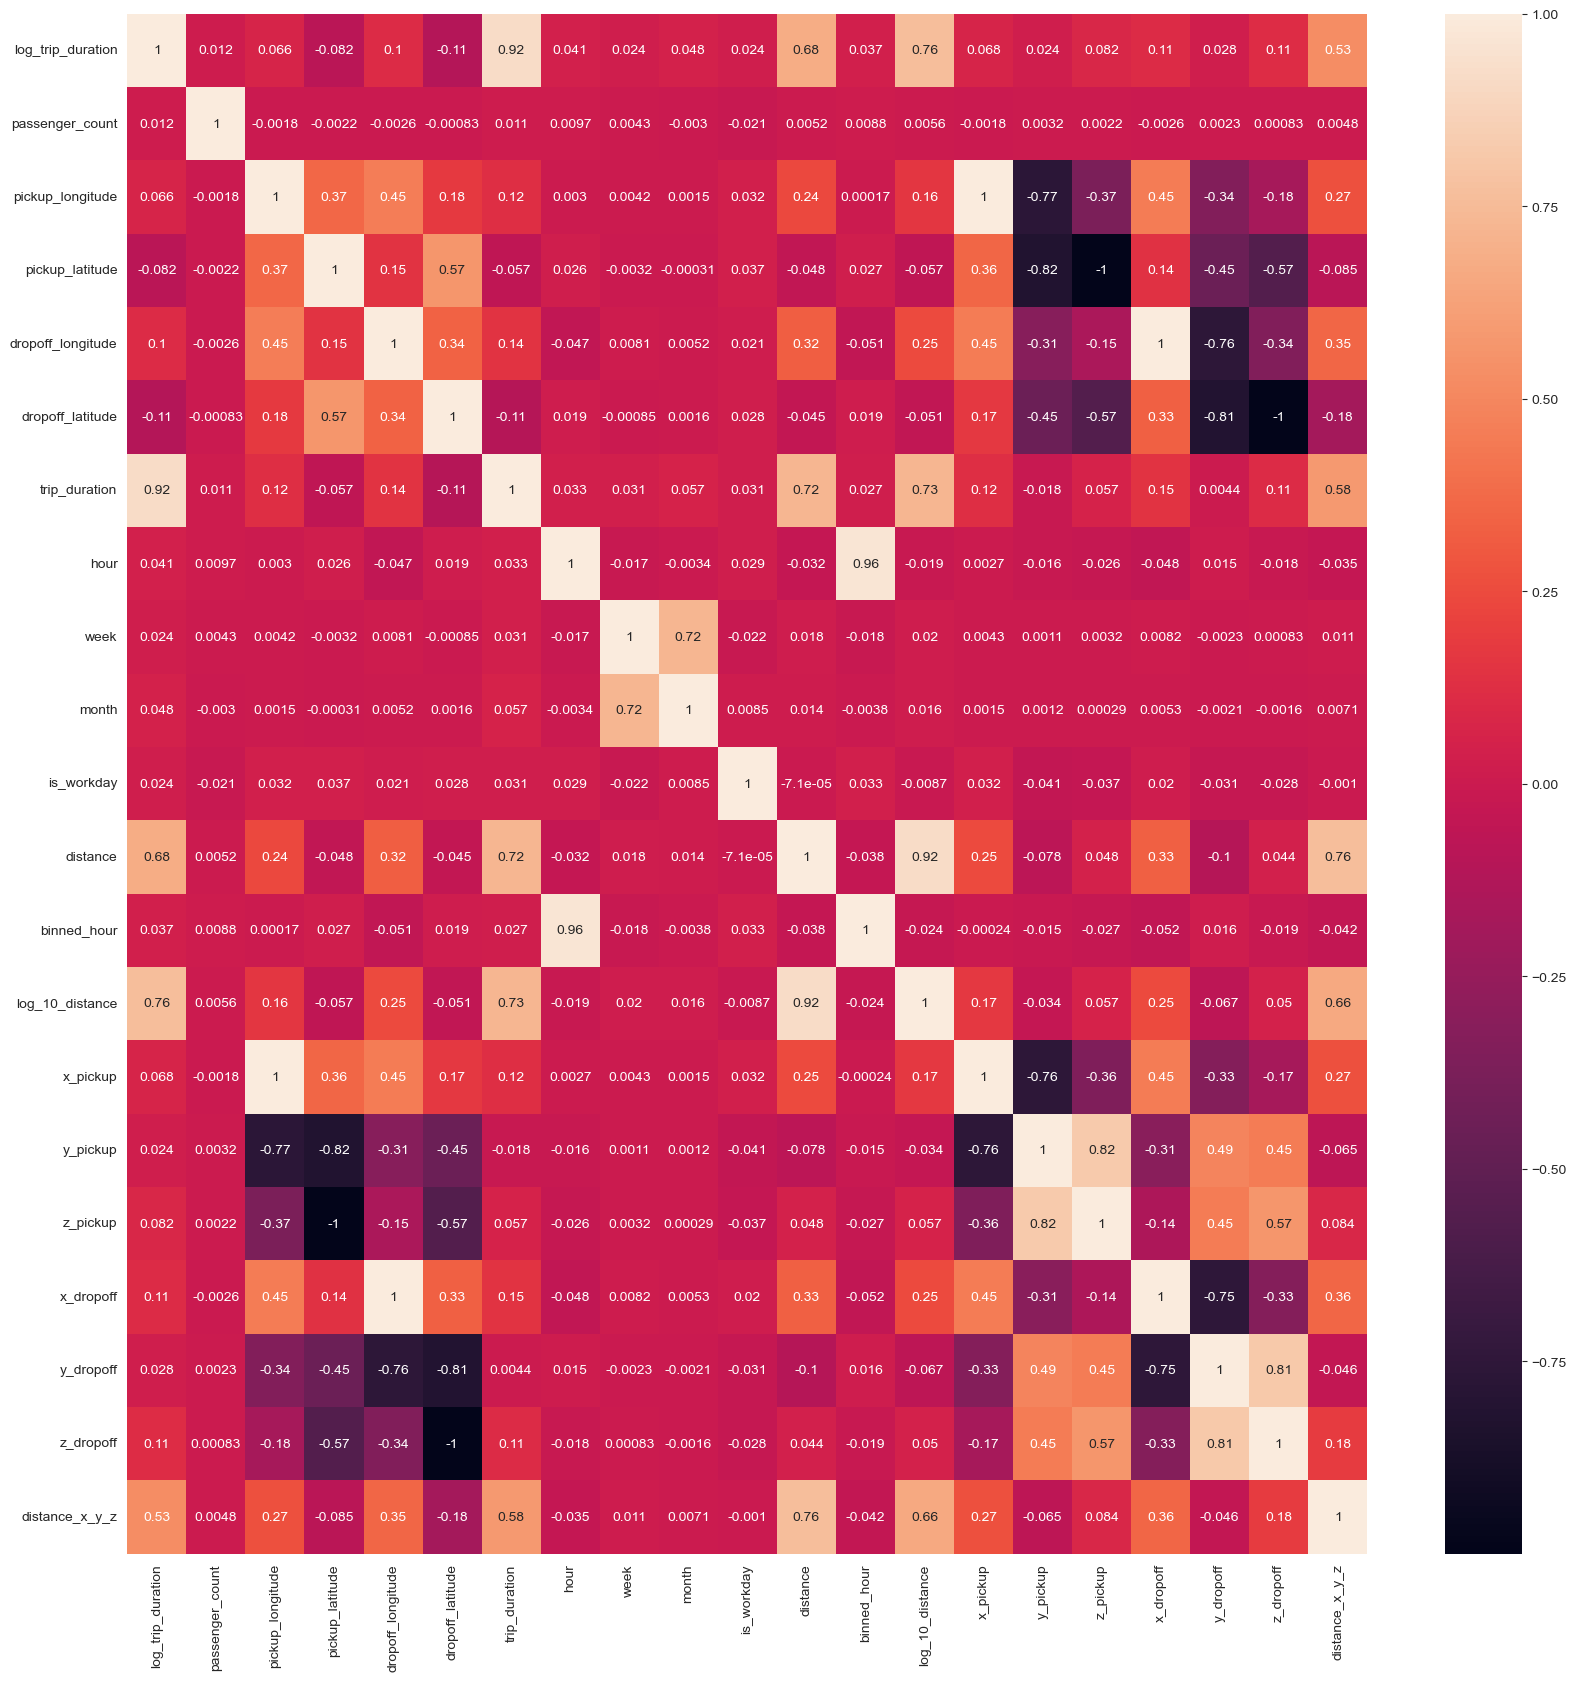

<Figure size 640x480 with 0 Axes>

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay 


df = pd.read_csv(f'clean/transformed_train_df.csv')
features = ['is_workday', 'binned_hour', 'log_10_distance', 
            'x_pickup', 'y_pickup', 'z_pickup', 'x_dropoff','y_dropoff', 'z_dropoff', 'log_trip_duration'] 


features = ['log_trip_duration', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'hour',
       'day_name', 'week', 'month', 'is_workday',
       'distance', 'binned_hour', 'log_10_distance',
       'x_pickup', 'y_pickup', 'z_pickup', 'x_dropoff', 'y_dropoff',
       'z_dropoff', 'distance_x_y_z']
corr_matrix = df[features].corr()
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
sns.heatmap(corr_matrix, annot=True)
plt.show()
plt.savefig('corr_matrix.png')

In [69]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'hour',
       'year', 'day_name', 'week', 'month', 'month_txt', 'is_workday',
       'distance', 'binned_hour', 'log_trip_duration', 'log_10_distance',
       'x_pickup', 'y_pickup', 'z_pickup', 'x_dropoff', 'y_dropoff',
       'z_dropoff', 'distance_x_y_z'],
      dtype='object')